# [머신러닝 기반 시계열 분석 2 실습]
# ANN
## [ANN 실전 - Solution]

##### jupyter notebook 단축키

- ctrl+enter: 셀 실행   
- shift+enter: 셀 실행 및 다음 셀 이동   
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)
- 함수 ( ) 안에서 shift+tab: arguments description. shift+tab+tab은 길게 볼 수 있도록

In [ ]:
!git clone https://github.com/Yong-Gon/LG2025_ANN.git #코랩 사용

fatal: destination path 'LG_time_series_day05' already exists and is not an empty directory.


## 0. 모듈 불러오기

In [ ]:
''' 기본 모듈 및 시각화 모듈 '''
from IPython.display import display, HTML, Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

''' 데이터 전처리 모듈 '''
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

''' Linear Regression 모듈 '''
from sklearn.linear_model import LinearRegression

''' Neural Network Classifier(분류기) 모듈 '''
from sklearn.neural_network import MLPClassifier

''' Neural Network Regressor 모듈 '''
from sklearn.neural_network import MLPRegressor

''' 결과 평가용 모듈 '''
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## 1. 분석데이터: Universal Bank (이진 분류 문제)

### 설명변수 (X)
- Age
- Experience
- Income
- ZIP Code
- Family
- CCAvg
- Education
- Mortgage
- Securities Account
- CD Account
- Online
- CreditCard

### 반응변수 (Y)
- Personal Loan

### 데이터 불러오기

In [ ]:
data = pd.read_csv('/content/LG2025_ANN/data/UniversalBank.csv', index_col=0)
# data = pd.read_csv('./data/UniversalBank.csv', index_col=0) # 로컬

## 1-1. 데이터 전처리 및 탐색적 데이터 분석

### 데이터 확인

In [ ]:
print('Data shape: {}'.format(data.shape))
data.head()

Data shape: (5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### 클래스 비율 확인 : Personal Loan 변수

In [ ]:
data['Personal Loan']

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [ ]:
data.groupby('Personal Loan')['Personal Loan'].count()

Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64

### 설명변수(X)와 반응변수(Y) 정의

In [ ]:
x = data.drop(labels='Personal Loan', axis=1)
y = data['Personal Loan']

In [ ]:
display(x.head())
display(y.head())

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

### 학습 데이터(Training Dataset)와 테스트 데이터(Testing Dataset) 분리
- 학습데이터와 테스트 데이터의 클래스 비율이 달라지지 않도록 stratify 옵션 사용

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, test_size=0.3)

### Matplotlib 을 이용한 클래스 비율 plotting
- import matplotlib.pyplot as plt
- plt.figure: plot을 그리기 위해 가장 먼저 선언 & plot 크기 지정
- plt.subplot: plot을 한번에 여러개 그리기 위해 선언(행크기/열크기/열번호or행번호)
- plt.hist: 히스토그램
- plt.plot(x,y): 2차원
- plt.xlim: x축 (최소,최대) 지정
- plt.ylim: y축 (최소,최대) 지정
- plt.title: 해당 plot의 제목 지정
- plt.show(): plot을 그리기 위해 가장 "마지막" 선언

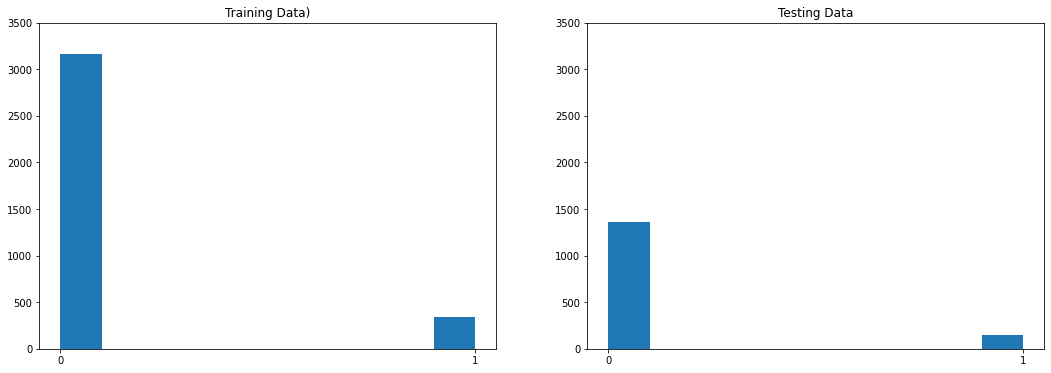

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.hist(train_y)
plt.ylim(0, 3500)
plt.xticks(np.arange(0, 2, 1))
plt.title('Training Data)')

plt.subplot(122)
plt.hist(test_y)
plt.ylim(0, 3500)
plt.xticks(np.arange(0, 2, 1))
plt.title('Testing Data')
plt.show()

### 정규화 : Standardization(표준정규화) with Standard Scaler



- 설명변수(X) 내 변수별 평균이 0이 되도록 변환
- Training Data를 기준으로 Scaler를 구성한 뒤, Testing Data에 Scaler를 적용

In [ ]:
x.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [ ]:
pd.DataFrame(train_x, columns = x.columns).describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03
mean,1.127987e-16,1.363988e-17,-3.559058e-17,-5.051118e-17,6.433584e-16,6.800909e-17,-3.854377e-16,3.222660e-16,9.595816e-16,1.935277e-16,6.377438e-16,3.006484e-16,-4.179514e-16
std,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00
min,-1.723270e+00,-1.951843e+00,-2.016032e+00,-1.424003e+00,-1.798221e+00,-1.214484e+00,-1.117153e+00,-1.035209e+00,-5.556921e-01,-3.401700e-01,-2.551956e-01,-1.224745e+00,-6.435382e-01
25%,-8.637495e-01,-9.057861e-01,-8.848685e-01,-7.699677e-01,-6.900939e-01,-1.214484e+00,-7.072336e-01,-1.035209e+00,-5.556921e-01,-3.401700e-01,-2.551956e-01,-1.224745e+00,-6.435382e-01
50%,-1.912325e-02,5.309987e-02,-1.474242e-02,-2.031371e-01,8.965706e-02,-3.452215e-01,-2.387543e-01,1.570356e-01,-5.556921e-01,-3.401700e-01,-2.551956e-01,8.164966e-01,-6.435382e-01
75%,8.603133e-01,8.376429e-01,8.553836e-01,5.381029e-01,8.293621e-01,5.240413e-01,3.468448e-01,1.349280e+00,4.389667e-01,-3.401700e-01,-2.551956e-01,8.164966e-01,1.553909e+00
max,1.739057e+00,1.883700e+00,1.986547e+00,3.285051e+00,2.003851e+00,1.393304e+00,4.738838e+00,1.349280e+00,5.520590e+00,2.939706e+00,3.918564e+00,8.164966e-01,1.553909e+00


## 1-2. 모델링: Multilayer Perceptron (MLP) Classifier

<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html'> Scikit-Learn MLP Classifier Manual </a>

### MLP Classifier 구조 및 정의

In [ ]:
clf_mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size=10,
                        hidden_layer_sizes=(8), max_iter=500,
                        solver='adam', verbose = True, random_state = 2025)

### MLP Classifier 학습

In [ ]:
clf_mlp.fit(train_x, train_y)

Iteration 1, loss = 0.32957938
Iteration 2, loss = 0.20677439
Iteration 3, loss = 0.16921535
Iteration 4, loss = 0.14513062
Iteration 5, loss = 0.12731288
Iteration 6, loss = 0.11480439
Iteration 7, loss = 0.10560306
Iteration 8, loss = 0.09879232
Iteration 9, loss = 0.09373508
Iteration 10, loss = 0.08961416
Iteration 11, loss = 0.08610270
Iteration 12, loss = 0.08309319
Iteration 13, loss = 0.08076821
Iteration 14, loss = 0.07888079
Iteration 15, loss = 0.07749736
Iteration 16, loss = 0.07567800
Iteration 17, loss = 0.07428074
Iteration 18, loss = 0.07270342
Iteration 19, loss = 0.07186184
Iteration 20, loss = 0.07090092
Iteration 21, loss = 0.06980614
Iteration 22, loss = 0.06878484
Iteration 23, loss = 0.06803898
Iteration 24, loss = 0.06715053
Iteration 25, loss = 0.06611990
Iteration 26, loss = 0.06552719
Iteration 27, loss = 0.06493951
Iteration 28, loss = 0.06405400
Iteration 29, loss = 0.06366206
Iteration 30, loss = 0.06278228
Iteration 31, loss = 0.06241881
Iteration 32, los

MLPClassifier(batch_size=10, hidden_layer_sizes=8, max_iter=500,
              random_state=2022, verbose=True)

### 학습 상태 확인 (learning curve)

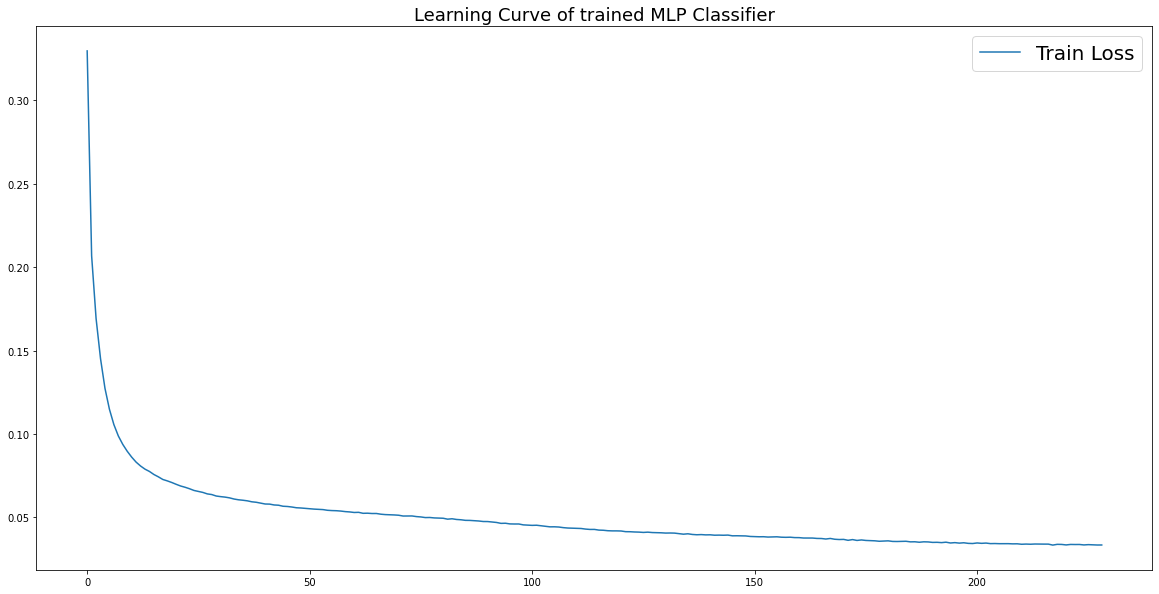

In [ ]:
# 그래프 배경화면 만들기
plt.figure(figsize=(20,10))

train_loss_values = clf_mlp.loss_curve_
plt.plot(train_loss_values,label='Train Loss')

plt.legend(fontsize=20)
plt.title("Learning Curve of trained MLP Classifier", fontsize=18)
plt.show()

## 1-3. Multilayer Perceptron 모델 성능 평가

### 학습된 MLP Classifier 결과 확인: Training Data

In [ ]:
train_y_pred = clf_mlp.predict(train_x)

In [ ]:
cm_train = confusion_matrix(y_true=train_y, y_pred=train_y_pred)

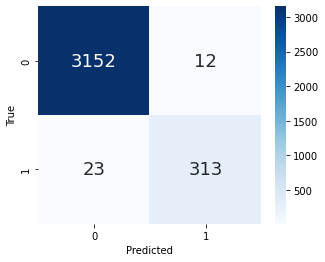

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(data=cm_train, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 학습된 MLP Classifier 성능 평가: 다양한 평가 지표


- 다양한 분류 평가 지표를 계산하기 위한 함수 정의

In [ ]:
def validation_measure(cm):
    TN, FP, FN, TP = cm.flatten()
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    F1_score = 2/(1/sensitivity + 1/precision)
    return accuracy, sensitivity, specificity, precision, F1_score

In [ ]:
train_acc, train_sens, train_spec, train_prec, train_f1 = validation_measure(cm_train)
print('Train Accuracy   : {:.3f}'.format(train_acc))
print('Train Sensitivity: {:.3f}'.format(train_sens))
print('Train Specificity: {:.3f}'.format(train_spec))
print('Train Precision  : {:.3f}'.format(train_prec))
print('Train F1 Score   : {:.3f}'.format(train_f1))

Train Accuracy   : 0.990
Train Sensitivity: 0.932
Train Specificity: 0.996
Train Precision  : 0.963
Train F1 Score   : 0.947


### 학습된 MLP Classifier 성능 평가: Testing Data

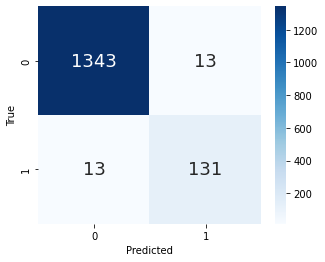

In [ ]:
test_y_pred = clf_mlp.predict(test_x)

cm_test = confusion_matrix(y_true=test_y, y_pred=test_y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 학습된 MLP Classifier 성능 평가: 다양한 평가 지표

In [ ]:
test_acc, test_sens, test_spec, test_prec, test_f1 = validation_measure(cm_test)
print('Test Accuracy   : {:.3f}'.format(test_acc))
print('Test Sensitivity: {:.3f}'.format(test_sens))
print('Test Specificity: {:.3f}'.format(test_spec))
print('Test Precision  : {:.3f}'.format(test_prec))
print('Test F1 Score   : {:.3f}'.format(test_f1))

Test Accuracy   : 0.983
Test Sensitivity: 0.910
Test Specificity: 0.990
Test Precision  : 0.910
Test F1 Score   : 0.910


## 2. 분석 데이터 : California Housing Data (수치 예측)

### 데이터 구조  
- 데이터: 1990년 캘리포니아의 각 행정 구역 내 주택 가격  
- 관측치 개수: 20640개
- 변수 개수: 설명변수 8개 / 반응변수 1개

### 설명 변수(X)      
- MedInc : 행정 구역 내 소득의 중앙값
- HouseAge : 행정 구역 내 주택 연식의 중앙값
- AveRooms : 평균 방 갯수
- AveBedrms : 평균 침실 갯수
- Population : 행정 구역 내 인구 수
- AveOccup : 평균 자가 비율
- Latitude : 해당 행정 구역의 위도
- Longitude : 해당 행정 구역의 경도

### 반응 변수(Y)
- House Value: 주택가격

In [ ]:
data1 = pd.read_csv('/content/LG2025_ANN/data/California.csv')
# data1 = pd.read_csv('./data/California.csv') # 로컬

## 2-1. 데이터 전처리 및 탐색적 데이터 분석

### 데이터 확인

In [ ]:
print('Data shape: {}'.format(data1.shape))
data1.head()

Data shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 설명변수(X)와 반응변수(Y) 정의 : House Value 변수

In [ ]:
x = data1.drop(labels='House Value', axis=1)
y = data1['House Value']
display(x.head())
display(y.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: House Value, dtype: float64

### 학습데이터(Training Dataset)와 테스트 데이터(Testing Dataset) 분리

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

### 정규화 : Standardization(표준정규화) with Standard Scaler

In [ ]:
x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

## 2-2. Multilayer Perceptron (MLP) Regressor

### MLP Regressor 정의
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html'> Scikit-Learn MLP Regressor Manual </a>

- <b>activation</b> - activation function 타입 (identity, logistic, tanh, <font color='red'>relu</font>) <br>
- <b>batch_size</b> - stochastic optimizer가 사용할 minibatch 크기 <br>
- <b>max_iter  </b> - stochastic optimizer의 최대 iteration 횟수 ( = Epochs )<br>
- <b>alpha     </b> - Learning Rate (과적합 방지용) <br>
- <b>solver    </b> - 경사하강법의 종류 (<font color='red'>adam</font>, sgd, lbfgs) <br>

In [ ]:
reg_mlp = MLPRegressor(activation='relu', alpha=1E-3, batch_size=25,
                       hidden_layer_sizes=(4), max_iter=1000,
                       solver='adam', verbose = True, random_state = 2025)

### MLP Regressor 학습

In [ ]:
reg_mlp.fit(train_x, train_y)

Iteration 1, loss = 3.42061316
Iteration 2, loss = 1.16347083
Iteration 3, loss = 0.61276187
Iteration 4, loss = 0.42554007
Iteration 5, loss = 0.33312985
Iteration 6, loss = 0.28132567
Iteration 7, loss = 0.25410168
Iteration 8, loss = 0.24066200
Iteration 9, loss = 0.23276284
Iteration 10, loss = 0.22723338
Iteration 11, loss = 0.22364290
Iteration 12, loss = 0.22194209
Iteration 13, loss = 0.21981245
Iteration 14, loss = 0.21672826
Iteration 15, loss = 0.21591237
Iteration 16, loss = 0.21429393
Iteration 17, loss = 0.21295120
Iteration 18, loss = 0.21061814
Iteration 19, loss = 0.21199518
Iteration 20, loss = 0.20955725
Iteration 21, loss = 0.20917241
Iteration 22, loss = 0.20914408
Iteration 23, loss = 0.20805215
Iteration 24, loss = 0.20873652
Iteration 25, loss = 0.20751793
Iteration 26, loss = 0.20797770
Iteration 27, loss = 0.20763910
Iteration 28, loss = 0.20592709
Iteration 29, loss = 0.20528344
Iteration 30, loss = 0.20494761
Iteration 31, loss = 0.20608811
Iteration 32, los

MLPRegressor(alpha=0.001, batch_size=25, hidden_layer_sizes=4, max_iter=1000,
             random_state=2022, verbose=True)

### 학습 상태 확인 (learning curve)

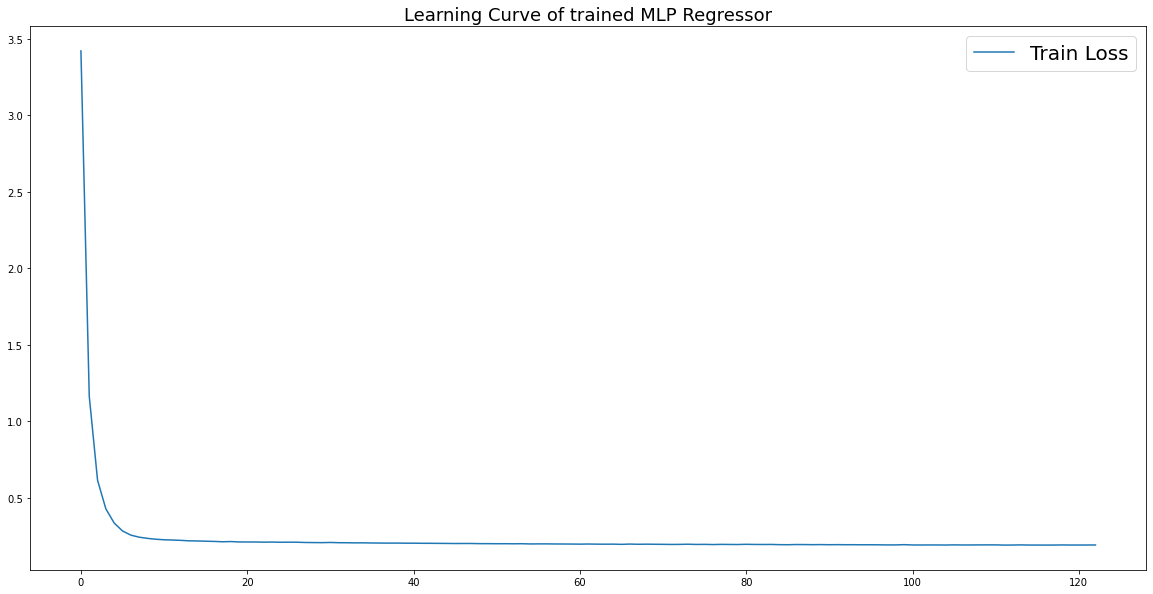

In [ ]:
plt.figure(figsize=(20,10))

train_loss_values = reg_mlp.loss_curve_
plt.plot(train_loss_values,label='Train Loss')

plt.legend(fontsize=20)
plt.title("Learning Curve of trained MLP Regressor", fontsize=18)
plt.show()

## 2-3. Multilayer Perceptron 모델 성능 평가

### 학습된 MLP Regressor 결과 확인 및 성능 평가 : Training Data

In [ ]:
train_y_pred = reg_mlp.predict(train_x)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [ ]:
print("Training MSE : {:.3f}".format(mean_squared_error(train_y, train_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(train_y, train_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(train_y, train_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(train_y, train_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(train_y, train_y_pred)))

Training MSE : 0.376
Training RMSE : 0.613
Training MAE : 0.435
Training MAPE : 24.975
Training R2 : 0.719


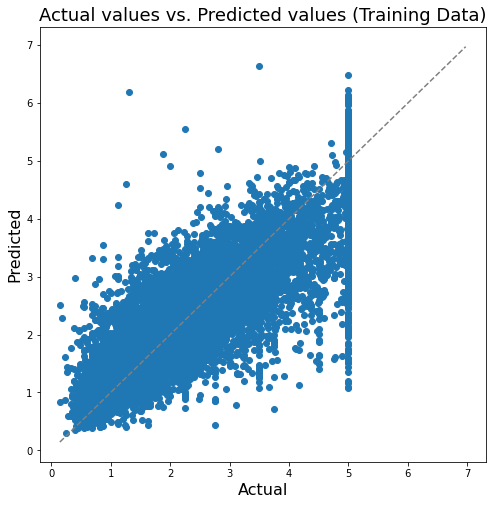

In [ ]:
# 산점도 그래프
fig_values = np.concatenate([train_y.squeeze(), train_y_pred.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Training Data)', size=18)
plt.scatter(train_y, train_y_pred)
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.show()

### 학습된 MLP Regressor 결과 확인 및 성능 평가 : Testing Data

In [ ]:
test_y_pred = reg_mlp.predict(test_x)

In [ ]:
print("Testing MSE : {:.3f}".format(mean_squared_error(test_y, test_y_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(test_y, test_y_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(test_y, test_y_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(test_y, test_y_pred)))
print("Testing R2 : {:.3f}".format(r2_score(test_y, test_y_pred)))

Testing MSE : 0.372
Testing RMSE : 0.610
Testing MAE : 0.427
Testing MAPE : 24.817
Testing R2 : 0.719


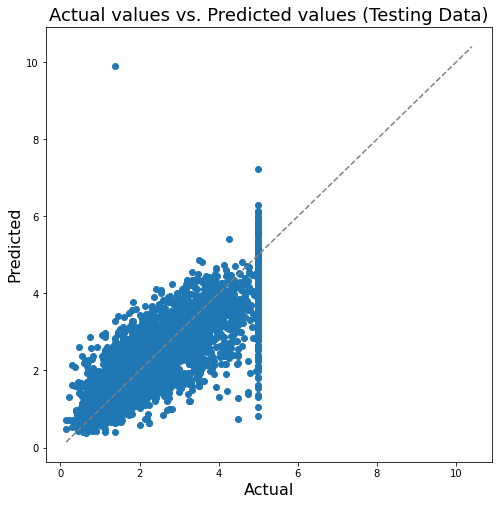

In [ ]:
# 산점도 그래프
fig_values = np.concatenate([test_y.squeeze(), test_y_pred.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Testing Data)', size=18)
plt.scatter(test_y, test_y_pred)
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.show()